<a href="https://colab.research.google.com/github/aquaxmiriel/worksheet0/blob/main/(10)2408239_NikishaShrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Build a Sentiment Analysis Model for IMDB Movie Review Dataset

In [1]:
#Part1
#1.Load the dataset and preprocess the reviews.
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/AIWeek2/IMDB Dataset.csv")
print(data.head)
print(data.columns)
length = len(data['review'])

<bound method NDFrame.head of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>
Index(['review', 'sentiment'], dtype='object')


In [2]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
data = data.reset_index(drop=True)
corpus=[]

# contain list of words that will be used fro training -> final words after cleaning
for i in range(0,length):
  # re is used to remove punctuations
  review = re.sub('[^a-zA-Z]', ' ', data['review'][i])#replaces the punctuation with space
  # converting to lowercase
  review=review.lower()
  # tokenize the reviews
  review=review.split()
  # remove common stopwords and stemming to reduce words to their root form
  ps = PorterStemmer()
  all_stopwords=stopwords.words('english')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# re-verifiying and further cleaning of the data
data_check = data.copy()
data_check['cleanText'] = corpus
data_check['sentiment'] = data_check['sentiment'].map({'positive': 1, 'negative':0})
data_check.head()

,review,sentiment,cleanText
0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


In [23]:
# construction feature matrix and label vector
X=data_check['cleanText'].values
y=data_check['sentiment'].values

In [24]:
#3.Use a naive bayes classifier to classify the reviews into positive and negative categories
from sklearn.feature_extraction.text import CountVectorizer



In [25]:
#a.Implement a bag-of-words model using CountVectorizer
cv = CountVectorizer(max_features=1000)
X=cv.fit_transform(X).toarray()

In [26]:
#2.Split the dataset into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
#3b.Train the naive bayes classifier using the training set
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [28]:
#Part2
#1.Evaluate the performance of the model using the following metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)


In [29]:
#a.Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8308


In [30]:
#b.Precision, Recall, and F1-score
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred))


Precision:  0.8280729268770829
Recall:  0.8382615598333003
F1-score:  0.8331360946745562


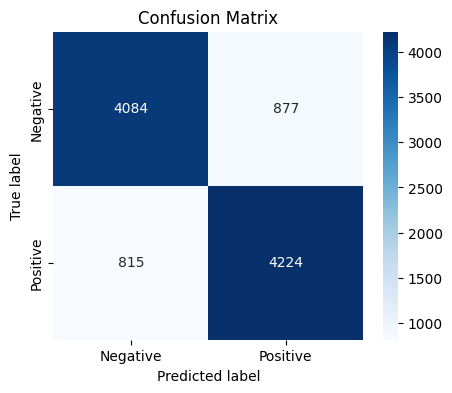

In [32]:
#c.Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
#d.ROC-AUC Score
print("ROC-AUC: ", roc_auc_score(y_test, y_pred))

ROC-AUC:  0.8307413423032657


#Feature Selection using Wrapper Methods - Breast Cancer Prognostic Dataset

In [45]:
#Part1: Data Loading and Preprocessing
#1.Load the breast cancer prognostic dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# convert to dataframe for better readability
df = pd.DataFrame(data.data, columns=data.feature_names)

# add target variable to DataFrame
df['target'] = data.target

print(df.head(100))


    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.990         10.38          122.80     1001.0          0.11840   
1        20.570         17.77          132.90     1326.0          0.08474   
2        19.690         21.25          130.00     1203.0          0.10960   
3        11.420         20.38           77.58      386.1          0.14250   
4        20.290         14.34          135.10     1297.0          0.10030   
..          ...           ...             ...        ...              ...   
95       20.260         23.03          132.40     1264.0          0.09078   
96       12.180         17.84           77.79      451.1          0.10450   
97        9.787         19.94           62.11      294.5          0.10240   
98       11.600         12.84           74.34      412.6          0.08983   
99       14.420         19.77           94.48      642.5          0.09752   

    mean compactness  mean concavity  mean concave points  mean symmetry  \

In [40]:
#3.Perform basic EDA
#a.Summarize key statistics
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [41]:
#b.Check for missing values and handle them appropriately
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [46]:
#4.Split the dataset into training(80%) and testing(20%) sets.
from sklearn.model_selection import train_test_split
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
#Part2: Apply a Wrapper Method
#1.Use Recursive Feature Elimination(RFE) with a Logistic Regression model to perform feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#define the model
model = LogisticRegression(max_iter=500)

In [74]:
#a.Select the top 5 features that contribute the most to predicting the target variable

# initialize FRE
n_features_to_select = 5 #number of features to keep
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# fit RFE
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=5)

In [75]:
#b.Visualize the ranking of features
ranking = rfe.ranking_ #feature rankings (1 indicates selected features)
print(f"Feature Ranking: {ranking}")

Feature Ranking: [ 9 15 13  7 25 12 14  2 19 24  1 21 11  4 18  6 22 20 16 17  1  1  3  1
  8 26  5  1 10 23]


In [77]:
#3.Train the logistic regression model using only the selected features

# get selected features
selected_features = rfe.support_ #boolean mask of selected features

# transform the dataset to include only selected features
X_train_scaled_rfe = rfe.transform(X_train_scaled)
X_test_scaled_rfe = rfe.transform(X_test_scaled)

# train the model on the selected features
model.fit(X_train_scaled_rfe, y_train)

# predict and evaluate
y_pred = model.predict(X_test_scaled_rfe)

print(f"Selected Features Mask: {selected_features}")

Selected Features Mask: [False False False False False False False False False False  True False
 False False False False False False False False  True  True False  True
 False False False  True False False]


In [82]:
#Part3: Model Evaluation
#1.Evaluate the model's performance using the testing set: Accuracy, Precision, Recall, F1-score, and ROC-AUC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled_rfe)[:, 1])

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1-Score: 0.9790
ROC-AUC: 0.9977


In [84]:
#2.Compare the performance of the model trained on all features versus the model trained on the selected features

model.fit(X_train_scaled, y_train)
y_pred_all = model.predict(X_test_scaled)

# calculate metrics for all features model
accuracy_all = accuracy_score(y_test, y_pred_all)
precision_all = precision_score(y_test, y_pred_all)
recall_all = recall_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)
roc_auc_all = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

print("Performance of model trained on all features:")
print(f"Accuracy: {accuracy_all}")
print(f"Precision: {precision_all}")
print(f"Recall: {recall_all}")
print(f"F1-Score: {f1_all}")
print(f"ROC-AUC: {roc_auc_all}")

print("\nPerformance of model trained on selected features:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Performance of model trained on all features:
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1-Score: 0.9790209790209791
ROC-AUC: 0.99737962659679

Performance of model trained on selected features:
Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1-Score: 0.9790
ROC-AUC: 0.9977


In [85]:
#Part4: Experiment
#1.Experiment with different numbers of selected features (e.g., top3, top7)

# List of different numbers of features to select
n_features_list = [3, 7, 5]  # Top 3, top 7, and top 5 features

# Loop through different numbers of selected features
for n_features in n_features_list:
    print(f"\nEvaluating model with top {n_features} selected features:")

    # Initialize RFE with a different number of features to select
    rfe = RFE(estimator=model, n_features_to_select=n_features)

    # Fit RFE with scaled data
    rfe.fit(X_train_scaled, y_train)

    # Get selected features and transform datasets
    selected_features = rfe.support_
    X_train_scaled_rfe = rfe.transform(X_train_scaled)
    X_test_scaled_rfe = rfe.transform(X_test_scaled)

    # Train the model with selected features
    model.fit(X_train_scaled_rfe, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_scaled_rfe)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled_rfe)[:, 1])

    # Print the evaluation results for the current number of features
    print(f"Selected Features Mask: {selected_features}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")



Evaluating model with top 3 selected features:
Selected Features Mask: [False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False  True False False]
Accuracy: 0.9649122807017544
Precision: 0.971830985915493
Recall: 0.971830985915493
F1-Score: 0.971830985915493
ROC-AUC: 0.9970520799213889

Evaluating model with top 7 selected features:
Selected Features Mask: [False False False False False False False  True False False  True False
 False False False False False False False False  True  True  True  True
 False False False  True False False]
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1-Score: 0.9790209790209791
ROC-AUC: 0.9983622666229938

Evaluating model with top 5 selected features:
Selected Features Mask: [False False False False False False False False False False  True False
 False False False False False False False False  True  True

#2.Discuss how feature selection affects model performance



In this experiment, the model performs very well with both 3 and 5 features, but the best performance is achieved with the top 7 features. However, the performance gains between top 5 and top 7 features are marginal. Therefore, selecting 5 features could be considered an optimal trade-off between performance and model complexity. Feature selection allows you to build a model that is simpler, more efficient, and less prone to overfitting while maintaining high predictive accuracy.